Tüm bilgiler ve kodlar OpenCV'nin kendi sitesindeki tutorial'den alınmıştır. 

# Gerekenler

-OpenCv https://opencv.org/releases.html

-Python 2.7.+

-Numpy

-Matloblib

# OpenCv Kurulumu

Linux için sudo apt install python-opencv

Windows için Son versiyonun "Win Pack" kütüphane dosyası indirilir. İndirilen dosya çalıştırılınca içindekilerin çıkarılmasını istediği yeri sorar. Direkt olarak C: dizinine çıkarma işlemi yapılır. Çıkan dosya "C:\OpenCV" isminde olmalıdır ve içerisinde "C:\OpenCV\build" ve "C:\OpenCV\resources" şeklinde klasörler bulunur (dizin hiyerarşisine dikkat edilmelidir).

"C:\OpenCV\build\x64\vc14\bin" adresini kopyalıyoruz. Bunu ortam değişkenlerine eklemek gerekecek (vc14 versiyon ile alakalıdır, eğer daha altı, yada vc15 ve üstü kullanılıyorsa ona göre ilgili klasör seçilmeli).

"Bilgisayarım > Özellikler > Gelişmiş Sistem Ayarları > Gelişmiş" penceresine geliyoruz ve "Ortam Değişkenleri" butonuna basıyoruz. "Sistem Değişkenleri" bölümünde "path" değişkenini seçip "düzenle" butonuna basıyoruz. Açılan pencerede "yeni" butonuna basıp kopyalamış olduğumuz pathı buraya yapıştırıyoruz ve "tamam" butonu ile onaylıyoruz (Windows sürümü farklı ise gidişat farklılık gösterebilir ancak yolu budur).

In [1]:
import cv2 as cv
import numpy as np
import matplotlib as mp

#https://docs.opencv.org/4.0.1/dc/d4d/tutorial_py_table_of_contents_gui.html

# 1 Resim İşlemleri

Resim okuma, oluşturma ve gösterme.

In [14]:
# Resmi siyah beyaz olarak değişkene atar. Resim yolu yanlışsa hata vermez
img = cv.imread('sabertooth.jpg',0)

# Resmi ekranda gösterir. Göstermeden önce ekranı oluşturuyoruz ve Normal özelliğini veriyoruz
# Bu özellik ekranın boyutuyla oynayabileceğimiz anlamına gelir. Sabir olsun istiyorsak AUTOSIZE yazarız
cv.namedWindow('ekranismi', cv.WINDOW_NORMAL)
cv.imshow('ekranismi', img)
cv.waitKey(0)
cv.destroyAllWindows()

# Bir resmi dosya olarak oluşturmak için kullanılır. Uzantısını kendimiz belirliyebiliyoruz
cv.imwrite('newsabertooth.jpg',img)

In [18]:
# Eğer bir tuşa basana kadar resmin gösterilip kapanmasını istiyorsak
img = cv.imread('sabertooth.jpg',0)
cv.imshow('ekranismi',img)
k = cv.waitKey(0)
# Eğer hata çıkarsa 64bit işlemciden ötürü olabilir, bunu kullan k = cv.waitKey(0) & 0xFF
if k == 27:         # ESC basılınca kapanacağından ESC basılmasını bekliyor
    cv.destroyAllWindows()
elif k == ord('s'): # S basılınca kaydedilecek ve kapanacak
    cv.imwrite('newsabertooth.png',img)
    cv.destroyAllWindows()

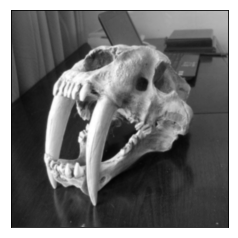

In [28]:
# Matplotlib kullanarak
from matplotlib import pyplot as plt

img = cv.imread('sabertooth.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # X Y sayılarını gizlemek için lazım
plt.show()

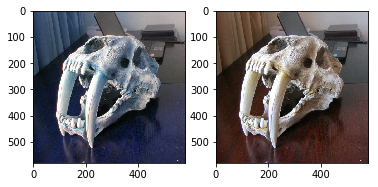

In [32]:
# Resmi renkli halde göstermek istersek eğer
img = cv.imread('sabertooth.jpg')
b,g,r = cv.split(img)
img2 = cv.merge([r,g,b])
plt.subplot(121), plt.imshow(img) # yüklenen rengi
plt.subplot(122), plt.imshow(img2) # gerçek rengi
plt.show()

# 2 Video İşlemleri

Video okuma, gösterme, kaydetme ve kameradan görüntü yakalama işlemleri.

In [3]:
# Kameradan video yakalama ve kareler üzerinde işlemler yapabilme
cap = cv.VideoCapture(0) #iki kamera varsa 1 yazılır. bir kamera var diye 0 yazdık.
while(True):
    # frame-frame olarak görüntü al.
    ret, frame = cap.read()
    # frameler üzerindeki işlemleri burada yapabiliriz.
    #gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)  # bu gri renkte gösterir
    b,g,r = cv.split(frame)
    gray = cv.merge([r,g,b]) # bir nevi renklendirme yapıyoruz
    # frameyi göster
    cv.imshow('frame',gray)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
# herşey bitince kamerayı kapatıyoruz.
cap.release()
cv.destroyAllWindows()

In [ ]:
# Hali hazırdaki bir videoyu yürütme
cap = cv.VideoCapture('video.avi')
while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    cv.imshow('frame',gray)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

In [ ]:
# Video kaydetme. Kameradan yakalanan her bir kareyi teker teker ard arda birleştirerek kaydeder
cap = cv.VideoCapture(0)
# Video yazma objesi tanımlıyoruz
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi',fourcc, 20.0, (640,480))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv.flip(frame,0)
        # write the flipped frame
        out.write(frame)
        cv.imshow('frame',frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
# herşey bitince aygıtları bırakıver
cap.release()
out.release()
cv.destroyAllWindows()